Ejercicio 1

Objetivo:
El propósito de este ejercicio es llevar a cabo un análisis exploratorio de un conjunto de datos que
contiene información demográfica y económica de las provincias de Argentina
(provincias_datos_2022.xlsx). Este análisis tiene como objetivo realizar una exploración de las
variables e identificar características relevantes o asociaciones que permitan obtener conocimientos
relevantes para la toma de decisiones informadas en diversos ámbitos, como el económico, social y
político.
Instrucciones:
1. Realizar las tareas de limpieza, transformación y normalización de los datos contenidos en el
archivo "provincias_datos_2022.xlsx" a fin de asegurar la calidad y homogeneidad de la información.
2. Una vez que los datos hayan sido curados, proceder a explorar cada variable y las posibles
relaciones entre las variables del conjunto de datos, tales como la población, la cantidad de
hogares, los ingresos laborales, la tasa de empleo y la superficie en km2. Para ello, se deben
emplear técnicas de visualización y estadística descriptiva.
3. Al concluir el análisis, se espera que el estudiante presente sus hallazgos y conclusiones,
destacando cualquier patrón o tendencia que resulte relevante y contribuya a una mayor
comprensión de las relaciones entre las variables estudiadas.
4. Escribir el informe incluyendo código Python utilizado, las visualizaciones y las conclusiones en
un cuaderno Google Colab. El dataframe final curado debe ser exportado a formato .parquet.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
#Ruta de dataset:
#Modificar en caso de utilizar un archivo que no se encuentra en el directorio raíz
ruta_dataset = '/content/provicias_datos_2022.csv'

## Lectura y presentación de datos, creación de DataFrame 

In [29]:
# Lectura del dataset
data_provincias=pd.read_csv(ruta_dataset, delimiter=';',encoding='utf-8')

# Nos llevamos como nombres de columnas a la fila de datos de indice 2
data_provincias.columns=data_provincias.iloc[2]

# Quitamos del dataset filas sin importancia
data_provincias.drop([0,1,2], inplace=True)	

# Reseteamos indices
data_provincias.reset_index(drop=True, inplace=True)

# Formateamos los nombres de las columnas
data_provincias.columns=['Provincia','Población (miles)','Hogares (miles)','Ingresos laborales (miles pesos)','Tasa de desempleo (%)','Superficie (km2)','Exportaciones (millones USD)']

In [30]:
data_provincias

,Provincia,Población (miles),Hogares (miles),Ingresos laborales (miles pesos),Tasa de desempleo (%),Superficie (km2),Exportaciones (millones USD)
0,Ciudad Autónoma de Buenos Aires,3.004,1.263,211.877.384,"4,7","205,9","311,163"
1,Buenos Aires,17.292,5.738,623.250.917,"8,7","305.907,40","33024,657"
2,Catamarca,336,102,8.460.986,"7,3","101.486,10","201,03"
3,Chaco,3.477,1.251,122.790.341,"6,5","99.763,30","516,336"
4,Chubut,967,287,24.733.558,"5,3","224.302,30","2575,372"
5,Córdoba,1.044,321,22.744.468,"2,6","164.707,80","12851,979"
6,Corrientes,591,205,30.606.036,"3,6","89.123,30","273,185"
7,Entre Ríos,1.252,431,40.510.249,"6,4","78.383,70","1911,902"
8,Formosa,509,148,9.586.123,"3,3","75.488,30","40,614"
9,Jujuy,696,197,17.044.750,"5,1","53.244,20","873,44"


## Formateo de datos:

Realizamos el formateo y curado de los datos para que se visualicen correctamente y poder manipularlos de forma adecuada


In [31]:
# Población
data_provincias['Población (miles)']=data_provincias['Población (miles)'].astype(str)
data_provincias['Población (miles)']=data_provincias['Población (miles)'].apply(lambda x: str(x.replace('.','')))
data_provincias['Población (miles)']=data_provincias['Población (miles)'].astype(float)

# Superficie
data_provincias['Superficie (km2)']=data_provincias['Superficie (km2)'].apply(lambda x: str(x.replace('.','')))
data_provincias['Superficie (km2)']=data_provincias['Superficie (km2)'].apply(lambda x: str(x.replace(',','.')))
data_provincias['Superficie (km2)']=data_provincias['Superficie (km2)'].astype(float)

# Hogares
data_provincias['Hogares (miles)']=data_provincias['Hogares (miles)'].apply(lambda x: str(x.replace('.','')))
data_provincias['Hogares (miles)']=data_provincias['Hogares (miles)'].astype(float)
data_provincias['Hogares (miles)']

# Ingresos laborales
data_provincias['Ingresos laborales (miles pesos)']=data_provincias['Ingresos laborales (miles pesos)'].astype(str)
data_provincias['Ingresos laborales (miles pesos)']=data_provincias['Ingresos laborales (miles pesos)'].apply(lambda x: str(x.replace('.','')))
data_provincias['Ingresos laborales (miles pesos)']=data_provincias['Ingresos laborales (miles pesos)'].astype(float)
data_provincias['Ingresos laborales (miles pesos)']

# Tasa de desempleo
data_provincias['Tasa de desempleo (%)']=data_provincias['Tasa de desempleo (%)'].apply(lambda x: str(x.replace(',','.')))
data_provincias['Tasa de desempleo (%)']=data_provincias['Tasa de desempleo (%)'].astype(float)
data_provincias['Tasa de desempleo (%)']

# Exportaciones
data_provincias['Exportaciones (millones USD)']=data_provincias['Exportaciones (millones USD)'].apply(lambda x: str(x.replace(',','.')))
data_provincias['Exportaciones (millones USD)']=data_provincias['Exportaciones (millones USD)'].astype(float)
data_provincias['Exportaciones (millones USD)']

data_provincias

,Provincia,Población (miles),Hogares (miles),Ingresos laborales (miles pesos),Tasa de desempleo (%),Superficie (km2),Exportaciones (millones USD)
0,Ciudad Autónoma de Buenos Aires,3004.0,1263.0,211877384.0,4.7,205.9,311.163
1,Buenos Aires,17292.0,5738.0,623250917.0,8.7,305907.4,33024.657
2,Catamarca,336.0,102.0,8460986.0,7.3,101486.1,201.030
3,Chaco,3477.0,1251.0,122790341.0,6.5,99763.3,516.336
4,Chubut,967.0,287.0,24733558.0,5.3,224302.3,2575.372
5,Córdoba,1044.0,321.0,22744468.0,2.6,164707.8,12851.979
6,Corrientes,591.0,205.0,30606036.0,3.6,89123.3,273.185
7,Entre Ríos,1252.0,431.0,40510249.0,6.4,78383.7,1911.902
8,Formosa,509.0,148.0,9586123.0,3.3,75488.3,40.614
9,Jujuy,696.0,197.0,17044750.0,5.1,53244.2,873.440


## Búsqueda de datos ausentes en el dataset


In [32]:
data_provincias.isna().sum()

# Verifico datos faltantes:
data_provincias['Población (miles)']

# Falta el dato de población con indice 18
print(data_provincias.iloc[18])
# Corresponde a San Luis.

print('')

# Verifico datos faltantes:
data_provincias['Ingresos laborales (miles pesos)']

# Falta el dato de ingresos con indice 15
print(data_provincias.iloc[15])
# Corresponde a Rio Negro.

Provincia                             San Luis
Población (miles)                          NaN
Hogares (miles)                          148.0
Ingresos laborales (miles pesos)    14056915.0
Tasa de desempleo (%)                      1.7
Superficie (km2)                       75347.1
Exportaciones (millones USD)           879.344
Name: 18, dtype: object

Provincia                           Río Negro
Población (miles)                       687.0
Hogares (miles)                         260.0
Ingresos laborales (miles pesos)          NaN
Tasa de desempleo (%)                     6.0
Superficie (km2)                     202168.6
Exportaciones (millones USD)          460.058
Name: 15, dtype: object


Observamos que en el dataset hay dos datos faltantes:


*   Población (miles) de la provincia de San Luis
*   Ingresos laborales (miles pesos) de la provincia de Rio Negro





---


## Inserción de datos faltantes:


Población (miles) de la provincia de San Luis



---



Para completar el dato faltante de población de San Luis, consideramos utilizar las densidades
de población de las provincias limítrofes: San Juan, Mendoza y La Rioja.

In [33]:
# Calculamos densidades
dens_lr = (data_provincias['Población (miles)'].iloc[11]) * 1000 / data_provincias['Superficie (km2)'].iloc[11]
dens_mza = (data_provincias['Población (miles)'].iloc[12]) * 1000 / data_provincias['Superficie (km2)'].iloc[12]
dens_sj = (data_provincias['Población (miles)'].iloc[17]) * 1000 / data_provincias['Superficie (km2)'].iloc[17]
print(f'Densidad La Rioja: {dens_lr} \nDensidad Mendoza: {dens_mza} \nDensidad San Juan: {dens_sj}')

# Calculamos el promedio de densidad de población (Población/Superficie)
dens_prom = (dens_lr + dens_mza + dens_sj) / 3
print(f'Densidad prom: {dens_prom}')

# Superficie de San Luis
sup_sl = data_provincias['Superficie (km2)'].iloc[18]

# Calculo de poblacion de San Luis utilizando dens_prom y sup_sl
pob_sl = dens_prom * sup_sl
pob_sl
print(f'Poblacion San Luis: {pob_sl}')

# Le damos mismo formato que los demas datos de población
pob_sl_redondeado = round(pob_sl / 1000)
pob_sl_def = float(pob_sl_redondeado)
pob_sl_def
print(f'Poblacion San Luis en formato: {pob_sl_def}')

# Agregamos el dato de la poblacion de San Luis al DataFrame
data_provincias['Población (miles)'].fillna(pob_sl_def, inplace=True)

Densidad La Rioja: 3.8909782859366273 
Densidad Mendoza: 11.189434168828972 
Densidad San Juan: 7.9165354794430565
Densidad prom: 7.665649311402885
Poblacion San Luis: 577584.4452312044
Poblacion San Luis en formato: 578.0


In [34]:
# Chequeamos
data_provincias[data_provincias['Provincia'] == 'San Luis']

,Provincia,Población (miles),Hogares (miles),Ingresos laborales (miles pesos),Tasa de desempleo (%),Superficie (km2),Exportaciones (millones USD)
18,San Luis,578.0,148.0,14056915.0,1.7,75347.1,879.344


Ingresos laborales (miles pesos) de la provincia de Rio Negro


---


Para el cálculo del dato faltante de Ingresos laborales de Rio Negro, consideramos buscar los datos de las provincias de la Patagonia.

In [35]:
# Creamos filtros para cada una de estas provincias
filtro_rionegro = data_provincias['Provincia'] == 'Río Negro'
filtro_neuquen = data_provincias['Provincia'] == 'Neuquén'
filtro_chubut = data_provincias['Provincia'] == 'Chubut'
filtro_santacruz = data_provincias['Provincia'] == 'Santa Cruz'
filtro_tierradelfuego = data_provincias['Provincia'] == 'Tierra del Fuego'

# Las localizamos
data_provincias[filtro_rionegro]        # iloc 15
data_provincias[filtro_neuquen]         # iloc 14
data_provincias[filtro_chubut]          # iloc 4
data_provincias[filtro_santacruz]       # iloc 19
data_provincias[filtro_tierradelfuego]  # iloc 23

# Construimos series con datos de las poblaciones e ingresos
poblaciones_patagonia = data_provincias.iloc[[4,14,15,19,23]]['Población (miles)']
ingresos_patagonia = data_provincias.iloc[[4,14,15,19,23]]['Ingresos laborales (miles pesos)']

# Ordenamos estos datos en forma ascendente
pob_patagonia_ordenada = poblaciones_patagonia.sort_values()
ingr_patagonia_ordenado = ingresos_patagonia.sort_values()

print(pob_patagonia_ordenada)
print('')
print(ingr_patagonia_ordenado)

23    172.0
19    379.0
14    612.0
15    687.0
4     967.0
Name: Población (miles), dtype: float64

23    12059449.0
19    19517125.0
4     24733558.0
14    28573541.0
15           NaN
Name: Ingresos laborales (miles pesos), dtype: float64


Conociendo a grandes rasgos las poblaciones y comparando, notamos que el valor de poblacion de Chubut es anómalo

De este modo, para calcular adecuadamente los Ingresos laborales de Rio Negro, decidimos usar las razones entre las poblaciones e ingresos de Neuquén, Santa Cruz y Tierra del Fuego

In [36]:
pob_nqn = data_provincias[filtro_neuquen]['Población (miles)'].sum()  
ingr_nqn = data_provincias[filtro_neuquen]['Ingresos laborales (miles pesos)'].sum()
print(f'Población Neuquén: {pob_nqn}')
print(f'Ingresos Neuquén: {ingr_nqn}')
print('')

pob_scruz = data_provincias[filtro_santacruz]['Población (miles)'].sum()  
ingr_scruz = data_provincias[filtro_santacruz]['Ingresos laborales (miles pesos)'].sum()
print(f'Población Santa Cruz: {pob_scruz}')
print(f'Ingresos Santa Cruz: {ingr_scruz}')
print('')

pob_tfuego = data_provincias[filtro_tierradelfuego]['Población (miles)'].sum()  
ingr_tfuego = data_provincias[filtro_tierradelfuego]['Ingresos laborales (miles pesos)'].sum()
print(f'Población Tierra del Fuego: {pob_tfuego}')
print(f'Ingresos Tierra del Fuego: {ingr_tfuego}')
print('')

razon1 = ingr_nqn / pob_nqn
print(f'Razón Ingr Neuquén / Pob Neuquén: {razon1}')
razon2 = ingr_scruz / pob_scruz
print(f'Razón Ingr Santa Cruz / Pob Santa Cruz: {razon2}')
razon3 = ingr_tfuego / pob_tfuego
print(f'Razón Ingr T. del Fuego / Pob T. del Fuego: {razon3}')

# Usamos la razón promedio para predecir los ingresos de Rio Negro
razon_prom = (razon1 + razon2 + razon3)/3
print(f'Razón promedio: {razon_prom}')
print('')

pob_rnegro = data_provincias[filtro_rionegro]['Población (miles)'].sum() 
print(f'Población Rio Negro: {pob_rnegro}')
ingr_rnegro = razon_prom * pob_rnegro

# Damos formato
ingr_rnegro_redondeado = round(ingr_rnegro)
ingr_rnegro_def = float(ingr_rnegro_redondeado)
print(f'Ingresos laborales Rio Negro = Razón promedio * Pob Rio negro = {ingr_rnegro_def}')

# Agregamos el dato de los Ingresos de Rio Negro al DataFrame
data_provincias['Ingresos laborales (miles pesos)'].fillna(ingr_rnegro_def, inplace=True)

Población Neuquén: 612.0
Ingresos Neuquén: 28573541.0

Población Santa Cruz: 379.0
Ingresos Santa Cruz: 19517125.0

Población Tierra del Fuego: 172.0
Ingresos Tierra del Fuego: 12059449.0

Razón Ingr Neuquén / Pob Neuquén: 46688.79248366013
Razón Ingr Santa Cruz / Pob Santa Cruz: 51496.37203166227
Razón Ingr T. del Fuego / Pob T. del Fuego: 70113.07558139534
Razón promedio: 56099.413365572575

Población Rio Negro: 687.0
Ingresos laborales Rio Negro = Razón promedio * Pob Rio negro = 38540297.0


In [39]:
# Chequeamos 
data_provincias[data_provincias['Provincia'] == 'Río Negro']

,Provincia,Población (miles),Hogares (miles),Ingresos laborales (miles pesos),Tasa de desempleo (%),Superficie (km2),Exportaciones (millones USD)
15,Río Negro,687.0,260.0,38540297.0,6.0,202168.6,460.058


# Análisis de datos

---


Realizamos en primer lugar un análisis de distribución de población y hogares respecto a la superficie, tomando en cuenta valores de superficie mayores y menores e iguales a la media.

### Análisis de distribución de población


---



Realizamos un testeo de Provincia-Población por orden descendente de población

In [41]:
pob_ordenadas = data_provincias['Población (miles)'].sort_values(ascending=False)

n = 1
for pob in pob_ordenadas:
  filtro = pob_ordenadas == pob
  print(f'{n}) Poblacion: {pob}')
  print('   Provincia:', data_provincias[filtro]['Provincia'].sum())
  print('')
  n+=1

1) Poblacion: 17292.0
   Provincia: Buenos Aires

2) Poblacion: 3477.0
   Provincia: Chaco

3) Poblacion: 3311.0
   Provincia: Santa Fe

4) Poblacion: 3004.0
   Provincia: Ciudad Autónoma de Buenos Aires

5) Poblacion: 1668.0
   Provincia: Mendoza

6) Poblacion: 1403.0
   Provincia: Tucumán

7) Poblacion: 1307.0
   Provincia: Salta

8) Poblacion: 1252.0
   Provincia: Entre Ríos

9) Poblacion: 1044.0
   Provincia: Córdoba

10) Poblacion: 1003.0
   Provincia: Misiones

11) Poblacion: 967.0
   Provincia: Chubut

12) Poblacion: 730.0
   Provincia: Santiago del Estero

13) Poblacion: 699.0
   Provincia: San Juan

14) Poblacion: 696.0
   Provincia: Jujuy

15) Poblacion: 687.0
   Provincia: Río Negro

16) Poblacion: 612.0
   Provincia: Neuquén

17) Poblacion: 591.0
   Provincia: Corrientes

18) Poblacion: 578.0
   Provincia: San Luis

19) Poblacion: 509.0
   Provincia: Formosa

20) Poblacion: 379.0
   Provincia: Santa Cruz

21) Poblacion: 356.0
   Provincia: La Rioja

22) Poblacion: 336.0
   

<ipython-input-41-4731f90a870b>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('   Provincia:', data_provincias[filtro]['Provincia'].sum())


Conociendo a grandes rasgos las poblaciones de las provincias del pais, notamos que los datos de población de Chaco y Córdoba no son del todo correctos.

Revisando los demas datos de ambas provincias:

In [40]:
df_cba_chaco = data_provincias.iloc[[3,5]]
df_cba_chaco

,Provincia,Población (miles),Hogares (miles),Ingresos laborales (miles pesos),Tasa de desempleo (%),Superficie (km2),Exportaciones (millones USD)
3,Chaco,3477.0,1251.0,122790341.0,6.5,99763.3,516.336
5,Córdoba,1044.0,321.0,22744468.0,2.6,164707.8,12851.979


Podemos notar a simple vista que los valores de Población, Hogares, Ingresos laborales y Superficie estan intercambiados de lugar entre ambas provincias.

Procedemos a realizar el intercambio de datos:

In [42]:
# Creamos filtros y nos llevamos los datos de las variables para ambas provincias
filtro_chaco = data_provincias['Provincia'] == 'Chaco'
filtro_cba = data_provincias['Provincia'] == 'Córdoba'

pob_chaco = data_provincias[filtro_chaco]['Población (miles)'].sum()
pob_cba = data_provincias[filtro_cba]['Población (miles)'].sum()

hogares_chaco = data_provincias[filtro_chaco]['Hogares (miles)'].sum()
hogares_cba = data_provincias[filtro_cba]['Hogares (miles)'].sum()

ingresos_chaco = data_provincias[filtro_chaco]['Ingresos laborales (miles pesos)'].sum()
ingresos_cba = data_provincias[filtro_cba]['Ingresos laborales (miles pesos)'].sum()

sup_chaco = data_provincias[filtro_chaco]['Superficie (km2)'].sum()
sup_cba = data_provincias[filtro_cba]['Superficie (km2)'].sum()

In [43]:
# Intercambio de datos entre Chaco y Cordoba

data_provincias.loc[3, 'Población (miles)'] = pob_cba
data_provincias.loc[5, 'Población (miles)'] = pob_chaco

data_provincias.loc[3, 'Hogares (miles)'] = hogares_cba
data_provincias.loc[5, 'Hogares (miles)'] = hogares_chaco

data_provincias.loc[3, 'Ingresos laborales (miles pesos)'] = ingresos_cba
data_provincias.loc[5, 'Ingresos laborales (miles pesos)'] = ingresos_chaco

data_provincias.loc[3, 'Superficie (km2)'] = sup_cba
data_provincias.loc[5, 'Superficie (km2)'] = sup_chaco

In [ ]:
# Chequeo de DataFrame completo
data_provincias

,Provincia,Población (miles),Hogares (miles),Ingresos laborales (miles pesos),Tasa de desempleo (%),Superficie (km2),Exportaciones (millones USD)
0,Ciudad Autónoma de Buenos Aires,3004.0,1263.0,211877384.0,4.7,205.9,311.163
1,Buenos Aires,17292.0,5738.0,623250917.0,8.7,305907.4,33024.657
2,Catamarca,336.0,102.0,8460986.0,7.3,101486.1,201.030
3,Chaco,1044.0,321.0,22744468.0,6.5,164707.8,516.336
4,Chubut,967.0,287.0,24733558.0,5.3,224302.3,2575.372
5,Córdoba,3477.0,1251.0,122790341.0,2.6,99763.3,12851.979
6,Corrientes,591.0,205.0,30606036.0,3.6,89123.3,273.185
7,Entre Ríos,1252.0,431.0,40510249.0,6.4,78383.7,1911.902
8,Formosa,509.0,148.0,9586123.0,3.3,75488.3,40.614
9,Jujuy,696.0,197.0,17044750.0,5.1,53244.2,873.440


### Exploramos datos estadísticos de la población

In [ ]:
print('Promedio:', data_provincias['Población (miles)'].mean())
print('Mediana:', data_provincias['Población (miles)'].median())
print('Varianza:', data_provincias['Población (miles)'].var())
print('Desvio std:', data_provincias['Población (miles)'].std())
print('Q1:', data_provincias['Población (miles)'].quantile(0.25))
print('Q3:', data_provincias['Población (miles)'].quantile(0.75))



Promedio: 1766.25
Mediana: 714.5
Varianza: 11786253.673913043
Desvio std: 3433.111369284871
Q1: 560.75
Q3: 1331.0


Notamos que la varianza y el desvío std son altos.

Procedemos a realizar un boxplot para ver cómo se distribuye la población entre las provincias

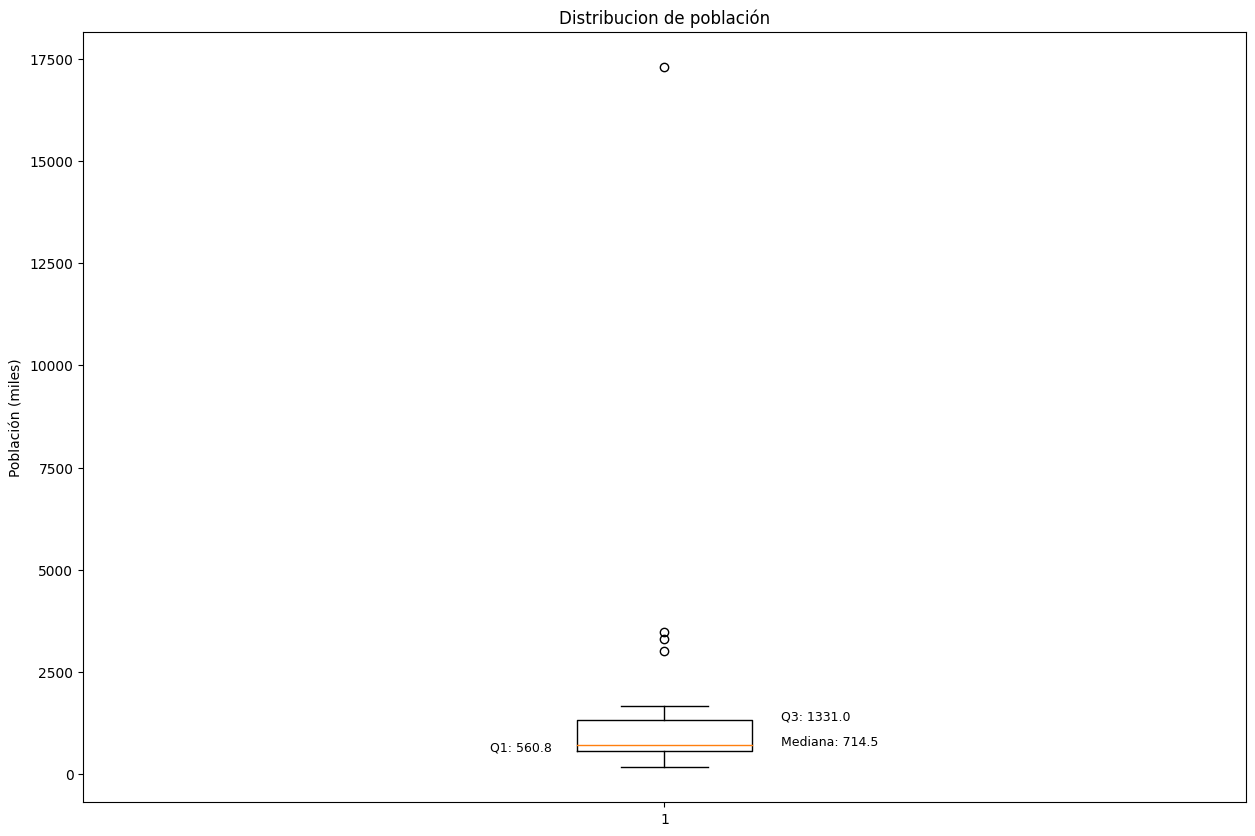

In [44]:
# Construccion del boxplot

fig = plt.figure(figsize =(15, 10))

plt.boxplot(data_provincias['Población (miles)'])

plt.text(1.1, data_provincias['Población (miles)'].median(), "Mediana: {:.1f}".format(data_provincias['Población (miles)'].median()),fontsize=9)
plt.text(0.85, data_provincias['Población (miles)'].quantile(q=0.25), "Q1: {:.1f}".format(data_provincias['Población (miles)'].quantile(q=0.25)),fontsize=9)
plt.text(1.1, data_provincias['Población (miles)'].quantile(q=0.75), "Q3: {:.1f}".format(data_provincias['Población (miles)'].quantile(q=0.75)),fontsize=9)

plt.ylabel('Población (miles)')
plt.title("Distribucion de población")
plt.show()

Como era de esperarse, encontramos datos atípicos.

En particular, hay un dato muy atipico (provincia de Buenos Aires) comparado al resto en cuanto a población.

Decidimos entonces realizar un análisis población-superficie para ver las relaciones que existen:

In [45]:
# Realizamos un testeo de Provincia-Superficie por orden descendente de superficie
sup_ordenadas = data_provincias['Superficie (km2)'].sort_values(ascending=False)

n = 1
for sup in sup_ordenadas:
  filtro = sup_ordenadas == sup
  print(f'{n}) Superficie: {sup}')
  print('   Provincia:', data_provincias[filtro]['Provincia'].sum())
  print('')
  n+=1

1) Superficie: 910324.4
   Provincia: Tucumán

2) Superficie: 305907.4
   Provincia: Buenos Aires

3) Superficie: 244457.5
   Provincia: Santa Cruz

4) Superficie: 224302.3
   Provincia: Chubut

5) Superficie: 202168.6
   Provincia: Río Negro

6) Superficie: 164707.8
   Provincia: Chaco

7) Superficie: 155340.5
   Provincia: Salta

8) Superficie: 149069.2
   Provincia: Mendoza

9) Superficie: 143492.5
   Provincia: La Pampa

10) Superficie: 136934.3
   Provincia: Santiago del Estero

11) Superficie: 133249.1
   Provincia: Santa Fe

12) Superficie: 101486.1
   Provincia: Catamarca

13) Superficie: 99763.3
   Provincia: Córdoba

14) Superficie: 94422.0
   Provincia: Neuquén

15) Superficie: 91493.7
   Provincia: La Rioja

16) Superficie: 89123.3
   Provincia: Corrientes

17) Superficie: 88296.2
   Provincia: San Juan

18) Superficie: 78383.7
   Provincia: Entre Ríos

19) Superficie: 75488.3
   Provincia: Formosa

20) Superficie: 75347.1
   Provincia: San Luis

21) Superficie: 53244.2
   

<ipython-input-45-b781147fa993>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('   Provincia:', data_provincias[filtro]['Provincia'].sum())


Notamos que Tucumán figura como la provincia con mayor superficie del país, esto claramente es erróneo

Decidimos no considerar este dato

In [48]:
# Creamos dataframe sin Tucumán
df_sin_tucuman = data_provincias.drop([22])

Para analizar la relación entre la población y la superficie, usamos un gráfico de dispersión (scatter plot)

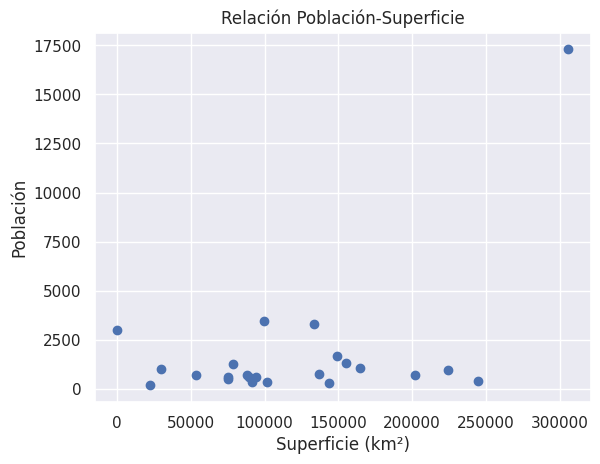

In [50]:
sns.set()

plt.scatter(df_sin_tucuman['Superficie (km2)'], df_sin_tucuman['Población (miles)'])
plt.xlabel('Superficie (km²)')
plt.ylabel('Población')
plt.title('Relación Población-Superficie')

plt.show()

Se puede ver que existe una distribución bastante homogénea en cuanto a esta relación. 

Sin embargo, notamos que, por más que Buenos Aires sea la provincia más grande del país, igualmente posee una relación población/superficie mucho más alta que el resto de provincias.

Por ende, decidimos no considerar la provincia de Buenos Aires para continuar el análisis y obtener mejor visualización de los gráficos

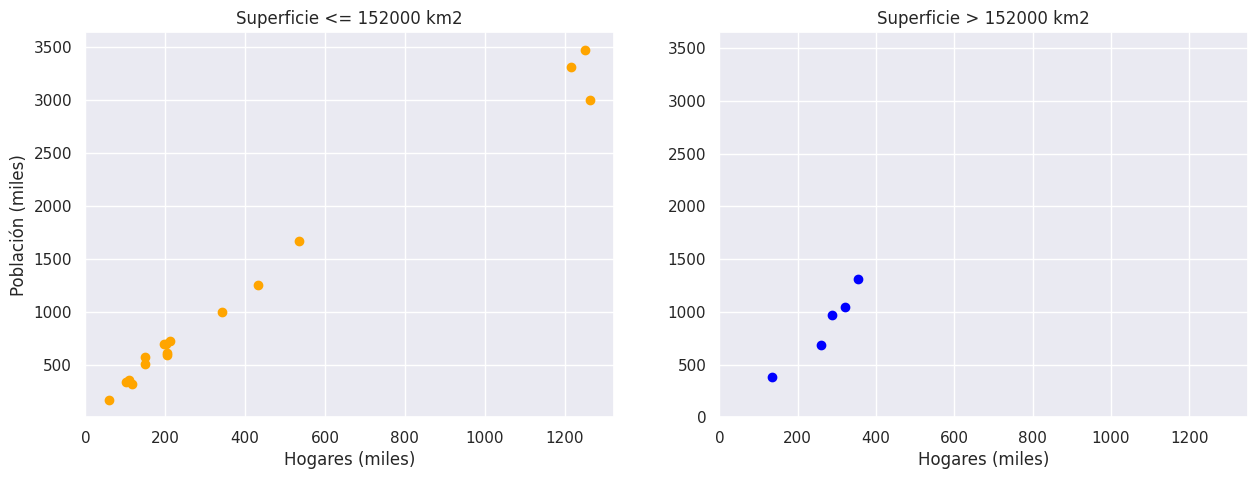

In [51]:
# Quitamos del dataframe a Bs As
df_sin_bsas = df_sin_tucuman.drop([1])

# Averiguamos la media de superficie
data_provincias['Superficie (km2)'].mean()

# Creamos dataframes con superficies mayores y menores e iguales a la media
df_sup_menor_igual_152mil = df_sin_bsas[df_sin_bsas['Superficie (km2)'] <= 152000]
df_sup_mayor_152mil = df_sin_bsas[df_sin_bsas['Superficie (km2)'] > 152000]

# Luego realizamos graficos de dispersión considerando también cantidad de hogares por provincia
sns.set() 

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].scatter(df_sup_menor_igual_152mil['Hogares (miles)'],df_sup_menor_igual_152mil['Población (miles)'], c = 'orange')
axs[0].set_title('Superficie <= 152000 km2')
axs[0].set_xlabel('Hogares (miles)')
axs[0].set_ylabel('Población (miles)')

axs[1].scatter(df_sup_mayor_152mil['Hogares (miles)'], df_sup_mayor_152mil['Población (miles)'], c = 'blue')
axs[1].set_title('Superficie > 152000 km2')
axs[1].set_xlabel('Hogares (miles)')
plt.ylim(0, 3650)
plt.xlim(0, 1350)

plt.show()

In [52]:
# Las tres provincias que presentan mayor población en el grafico anterior:
df_sup_menor_igual_152mil.sort_values(['Población (miles)'],ascending=False).iloc[[0,1,2]][['Provincia', 'Población (miles)', 'Hogares (miles)']]

,Provincia,Población (miles),Hogares (miles)
5,Córdoba,3477.0,1251.0
20,Santa Fe,3311.0,1215.0
0,Ciudad Autónoma de Buenos Aires,3004.0,1263.0


A partir de estos gráficos se puede determinar que las provincias con mayor superficie (salvo Buenos Aires) tienen muy poca población, y también muy pocos hogares, en relación a su superficie, siguiendo de este modo una relación lineal entre Población y Hogares. 

Entre las provincias con superficie menor a la media, también se logra ver una relación lineal entre la Población y los hogares.

Se determina que hay tres provincias con superficie menor a la media que presentan una relación más alta entre Población/Hogares que el resto de provincias dentro de este rango de superficie. Estas son: Córdoba, Santa Fe y la Ciudad Autónoma de Buenos Aires	



---

### Análisis de Ingresos laborales-Tasa de desempleo
Por último vamos a realizar un análisis de Ingresos laborales-Tasa de desempleo para poder descubrir que relación existe entre las provincias que pertenecen a distintos segmentos de Tasa de desempleo y sus Ingresos laborales

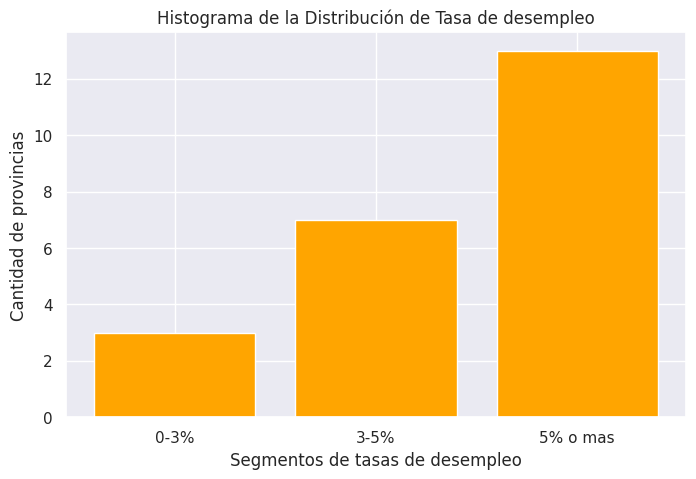

In [53]:
# Al observar el dataset, se encuentra que el dato de Tasa de desempleo de Tierra del Fuego es erróneo

# Decidimos crear un nuevo dataframe sin utilizar el dato de esa provincia
df_sin_tfuego = data_provincias.drop([23])

media_desempleo = df_sin_tfuego['Tasa de desempleo (%)'].mean()
# print(media_desempleo)

# Primero realizamos un histograma para conocer cuantas provincias se encuentran en estos tres segmentos de tasas de desempleo: entre 0-3%, 3-5% y 5% o mas
tasa_bins = [0, 3, 5, 10]
tasa_labels = ['0-3%', '3-5%', '5% o mas']

df_sin_tfuego['Tasa_desempleo_grupos'] = pd.cut(df_sin_tfuego['Tasa de desempleo (%)'], bins=tasa_bins, labels=tasa_labels)
tasa_distribution = df_sin_tfuego['Tasa_desempleo_grupos'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(tasa_distribution.index, tasa_distribution.values, color = 'orange')
plt.title('Histograma de la Distribución de Tasa de desempleo')
plt.xlabel('Segmentos de tasas de desempleo')
plt.ylabel('Cantidad de provincias')
plt.show()

Se puede notar que existen 13 provincias que se encuentran por encima del 5% de Tasa de desempleo



---


Ahora, queremos relacionar los ingresos laborales por provincia teniendo en cuenta aquellas que pertenezcan a estos segmentos de tasas de desempleo.

Nuestro objetivo es encontrar alguna provincia que tenga una baja Tasa de desempleo y a su vez, se posicione bien dentro de los ingresos laborales.

In [54]:
# Creamos los dataframes para estos tres segmentos de tasas de desempleo
df_tasa_0_3 = df_sin_tfuego[df_sin_tfuego['Tasa_desempleo_grupos'] == '0-3%']
df_tasa_0_3_sorted = df_tasa_0_3.sort_values(['Tasa de desempleo (%)'])

df_tasa_3_5 = df_sin_tfuego[df_sin_tfuego['Tasa_desempleo_grupos'] == '3-5%']
df_tasa_3_5_sorted = df_tasa_3_5 .sort_values(['Tasa de desempleo (%)'])

df_tasa_5_mas = df_sin_tfuego[df_sin_tfuego['Tasa_desempleo_grupos'] == '5% o mas']
df_tasa_5_mas_sorted = df_tasa_5_mas.sort_values(['Tasa de desempleo (%)'])

# A partir de ellos obtenemos las provincias que ocupan cada segmento
print('Provincias tasa desempleo entre 0-3%')
print(df_tasa_0_3['Provincia'].values)
print('')
print('Provincias tasa desempleo entre 3-5%')
print(df_tasa_3_5['Provincia'].values)
print('')
print('Provincias tasa desempleo 5% o mas')
print(df_tasa_5_mas['Provincia'].values)

Provincias tasa desempleo entre 0-3%
['Córdoba' 'San Luis' 'Santiago del Estero']

Provincias tasa desempleo entre 3-5%
['Ciudad Autónoma de Buenos Aires' 'Corrientes' 'Formosa' 'La Rioja'
 'Misiones' 'Neuquén' 'San Juan']

Provincias tasa desempleo 5% o mas
['Buenos Aires' 'Catamarca' 'Chaco' 'Chubut' 'Entre Ríos' 'Jujuy'
 'La Pampa' 'Mendoza' 'Río Negro' 'Salta' 'Santa Cruz' 'Santa Fe'
 'Tucumán']


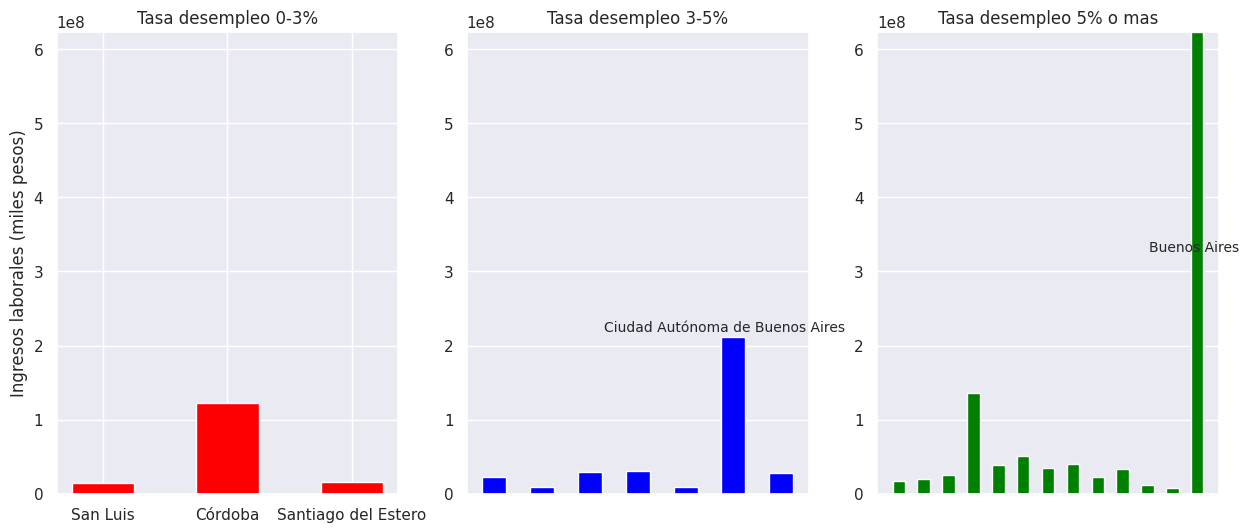

In [55]:
# Construimos tres graficos Provincia/Ingresos laborales, uno para cada segmento de Tasa de desempleo
plt.figure(figsize=(15, 6))

# Configuramos el primer gráfico de barras
plt.subplot(1, 3, 1)
plt.bar(df_tasa_0_3_sorted['Provincia'], df_tasa_0_3_sorted['Ingresos laborales (miles pesos)'], width=0.5, color='red')
plt.title('Tasa desempleo 0-3%')
plt.ylabel('Ingresos laborales (miles pesos)')
plt.ylim(0, 623250917.0)
indice_max = df_tasa_0_3_sorted['Ingresos laborales (miles pesos)'].idxmax()
plt.annotate(df_tasa_0_3_sorted['Provincia'][indice_max], xy=(indice_max, df_tasa_0_3_sorted['Ingresos laborales (miles pesos)'].max()),
             xytext=(0, -20), textcoords='offset points', ha='center', va='top')

# Configuramos el segundo gráfico de barras
plt.subplot(1, 3, 2)
plt.bar(df_tasa_3_5_sorted['Provincia'], df_tasa_3_5_sorted['Ingresos laborales (miles pesos)'], width=0.5, color='blue')
plt.title('Tasa desempleo 3-5%')
plt.ylim(0, 623250917.0)
indice_max = df_tasa_3_5_sorted['Ingresos laborales (miles pesos)'].idxmax()
plt.annotate(df_tasa_3_5_sorted['Provincia'][indice_max], xy=(indice_max, df_tasa_3_5_sorted['Ingresos laborales (miles pesos)'].max()),
             xytext=(166, 12), textcoords='offset points', ha='center', va='top',fontsize=10)
ax=plt.gca()
ax.get_xaxis().set_visible(False)

# Configuramos el tercer gráfico de barras
plt.subplot(1, 3, 3)
plt.bar(df_tasa_5_mas_sorted['Provincia'], df_tasa_5_mas_sorted['Ingresos laborales (miles pesos)'], width=0.5, color='green')
plt.title('Tasa desempleo 5% o mas')
ax=plt.gca()
ax.get_xaxis().set_visible(False)
indice_max = df_tasa_5_mas_sorted['Ingresos laborales (miles pesos)'].idxmax()
plt.annotate(df_tasa_5_mas_sorted['Provincia'][indice_max], xy=(indice_max, df_tasa_5_mas_sorted['Ingresos laborales (miles pesos)'].max()),
             xytext=(195, -160), textcoords='offset points', ha='center', va='bottom', fontsize=10)
plt.ylim(0, 623250917.0)

plt.show()

Siguiendo nuestro objetivo planteado, notamos que dentro del segmento de menor Tasa de desempleo, San Luis es la provincia con menor Tasa, sin embargo, posee  Ingresos Laborales no muy altos. Por otro lado, la provincia de Córdoba se posiciona bastante bien con respecto a los ingresos laborales y su Tasa de desempleo es también baja. Esto podría indicar que posee un mercado laboral fuerte. 


Por otro lado, podemos ver que entre las provincias con Tasa desempleo entre 3-5%, la Ciudad Autónoma de Buenos Aires posee muy buenos Ingresos laborales, aunque su Tasa ya es de unos puntos más arriba que la de Córdoba.



Por último, un caso a destacar es el de Buenos Aires, que posee el valor más alto, tanto en Tasa de desempleo, como en Ingresos laborales.

Esto se debe, dentro de otras cosas, a que, como vimos antes, la población de esta provincia es muy alta en comparación a las demás.


---



In [56]:
# Dataframe final curado exportado a formato .parquet
data_provincias.to_parquet('/content/df_ejercicio1.parquet')